In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drugs_df= pd.read_csv(mouse_drug_data_to_load)
mouse_drugs_df.head()

trial_data= pd.read_csv(clinical_trial_data_to_load)
trial_data.head()

# Combine the data into a single dataset- lets do a join on mouse ID
joined_drugs= pd.merge(trial_data, mouse_drugs_df, on="Mouse ID")
joined_drugs.head()

# Display the data table for preview- sort by timepoint ascending and then reset index 
joined_drugs_df= joined_drugs.sort_values("Timepoint", ascending=True)
joined_drugs_df

joined_drugs_new= joined_drugs_df.reset_index(drop=True)
joined_drugs_new.head()

# Mice now are sorted with each starting at time=0 and therefore you should not see a repeat of a mouse id until
# a different time 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,i635,0,45.0,0,Propriva
2,g791,0,45.0,0,Ramicane
3,w746,0,45.0,0,Propriva
4,r107,0,45.0,0,Propriva


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drugs_timepoints= joined_drugs_df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
drugs_timepoints

# Showing preview of new dataframe
summary_table=pd.DataFrame(drugs_timepoints)
summary_table.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard error data grouped by drug and timepoint 
drugs_timepoints_sem= joined_drugs_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
drugs_timepoints_sem

summary_table_sem=pd.DataFrame(drugs_timepoints_sem)
summary_table_sem.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Are we really about to make a pivot table??
munging_data = summary_table.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')


# Preview that Reformatting worked
munging_data.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Creating another pivot table of standard error values with timepoint as index
munging_data_sem = summary_table_sem.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Tumor Volume (mm3)')


# Preview that Reformatting worked
munging_data_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [6]:
# Extracting only the columns of drugs we're interested in 
part_table= munging_data[["Capomulin","Infubinol","Placebo","Ketapril"]]
part_table.head()




Drug,Capomulin,Infubinol,Placebo,Ketapril
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.125589,47.389175
10,43.084291,49.403909,49.423329,49.582269
15,42.064317,51.296397,51.359742,52.399974
20,40.716325,53.197691,54.364417,54.920935


In [7]:
# Storing the index values for "Placebo" so I can use as x component of graph later 
x = part_table.Placebo.index

# Storying the tumor volume values for "Placebo" so I can use as y component of graph later
y = part_table.Placebo.values

# Repeat but for Capomulin
xc = part_table.Capomulin.index
yc = part_table.Capomulin.values

# Repeat for Infubinol
xi = part_table.Infubinol.index
yi = part_table.Infubinol.values

# Repeat for Ketapril
xk = part_table.Ketapril.index
yk = part_table.Ketapril.values


# Now Storing the x and y values but for standard error- I only need standard error in relation to y values from above
ys= munging_data_sem.Placebo.values

# repeat for capomulin
ysc= munging_data_sem.Capomulin.values


# repeat for infubinol
ysi= munging_data_sem.Infubinol.values

# repeat for ketapril
ysk= munging_data_sem.Ketapril.values

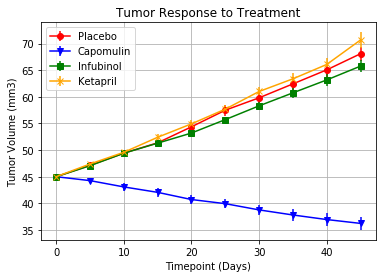

In [8]:
# Creating a line in the line graph for each drug according to the volume- each timepoint will contain a standard error value as well
plt.errorbar(x, y, yerr=ys, color="red", marker= "o", label="Placebo" )
plt.errorbar(xc, yc, yerr= ysc, color="blue", marker="v", label="Capomulin" )
plt.errorbar(xi, yi, yerr= ysi, color="green", marker="s", label="Infubinol" )
plt.errorbar(xk, yk, yerr= ysk, color="orange",marker="x", label="Ketapril" )


# Plotting the legend according to the label values from the above code
plt.legend()

# Ploting the grid for easier visualization 
plt.grid()


# Labeling the title, x axis, and y axis of the graph appropriately 
plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")


# Show me the line plot!
plt.show()



In [9]:
## storing the average number of mets as days increase by drugs
met_mean= joined_drugs_df.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
summary_table2=pd.DataFrame(met_mean)
summary_table2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# storing the sem of mets as days increase by drugs
met_sem= joined_drugs_df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
summary_table3=pd.DataFrame(met_sem)
summary_table3.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Pivot the mean table to make it easier to view 
met_reformat = summary_table2.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
met_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Storing the standard error 
met_reformat_sem = summary_table3.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Metastatic Sites')

# Preview that Reformatting worked
met_reformat_sem.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [13]:
# extracting the columns of drugs that we care about
met_final= met_reformat[["Capomulin","Infubinol","Ketapril","Placebo"]]


In [14]:
# Storing timepoints for x values
xm = met_reformat.Placebo.index
# Storing met averages for y values
ym = met_reformat.Placebo.values

# repeat both for capomulin
xcm = met_reformat.Capomulin.index
ycm = met_reformat.Capomulin.values

# repeat both for infubinol
xim = met_reformat.Infubinol.index
yim = met_reformat.Infubinol.values

# repeat both for ketapril
xkm = met_reformat.Ketapril.index
ykm = met_reformat.Ketapril.values


# Storing standerror values of mets in the y only
ysm=met_reformat_sem.Placebo.values

ysc=met_reformat_sem.Capomulin.values

ysi=met_reformat_sem.Infubinol.values

ysk=met_reformat_sem.Ketapril.values

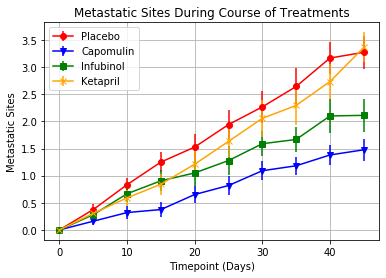

In [15]:
# Creating a line in the line graph for each drug according to the metastasis- each timepoint will contain a standard error value as well
plt.errorbar(xm, ym, yerr=ysm,  color="red", marker= "o", label="Placebo" )
plt.errorbar(xcm, ycm, yerr=ysc,  color="blue", marker="v", label="Capomulin" )
plt.errorbar(xim, yim, yerr=ysi,  color="green", marker="s", label="Infubinol" )
plt.errorbar(xkm, ykm, yerr=ysk, color="orange",marker="x", label="Ketapril" )


# plot the legend according the label values from above
plt.legend()

# plotting the grid
plt.grid()


# giving appropritate labels for title, x axis and y axis
plt.title("Metastatic Sites During Course of Treatments")
plt.ylabel("Metastatic Sites")
plt.xlabel("Timepoint (Days)")



plt.show()


In [16]:
# groupby drug and timepoint and take the count
mouse_counts= joined_drugs_df.groupby(["Drug","Timepoint"]).count()

# turn the groupby into a dataframe
mouse= pd.DataFrame(mouse_counts)

# extracting any of the columns will return the same values
mouse_redone= mouse["Mouse ID"]

# turn the most recent change into a dataframe
mouse_dataframe= pd.DataFrame(mouse_redone)
# rename the mouse ID column into mouse count 
mouse_dataframe2= mouse_dataframe.rename(columns={"Mouse ID": "Mouse Count"})
# preview the dataframe
mouse_dataframe2.head()


Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [17]:
# pivot the table with the index set to timepoint
mouse_summary_table = mouse_dataframe2.pivot_table(index = 'Timepoint', columns ='Drug', values = 'Mouse Count')
# Preview that Reformatting worked
mouse_summary_table.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [25]:
# use a lambda function to create my own function
magic_mouse=mouse_summary_table.apply(lambda x: x.div(x.iloc[0]).subtract(1).mul(100))+100

# extracting the columns we care about
magic_mouse_some= magic_mouse[["Capomulin","Infubinol","Ketapril","Placebo"]]
magic_mouse_some.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0


In [19]:
# storing the index values from the magic_mouse tables to a variable
xpp = magic_mouse_some.Placebo.index
# storing the percent remaining value for the y 
ypp = magic_mouse_some.Placebo.values


# repeat for the other 3 digs 
xpc = magic_mouse_some.Capomulin.index
ypc = magic_mouse_some.Capomulin.values

xpi = magic_mouse_some.Infubinol.index
ypi = magic_mouse_some.Infubinol.values

xpk = magic_mouse_some.Ketapril.index
ypk = magic_mouse_some.Ketapril.values




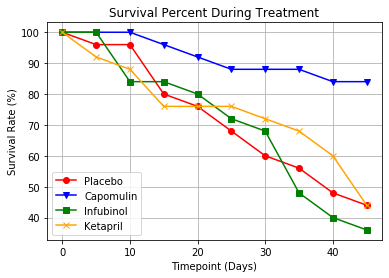

In [20]:
# using the saved variables above to simply plot the lines for each drug
plt.errorbar(xpp, ypp, color="red", marker= "o", label="Placebo" )
plt.errorbar(xpc, ypc, color="blue", marker="v", label="Capomulin" )
plt.errorbar(xpi, ypi, color="green", marker="s", label="Infubinol" )
plt.errorbar(xpk, ypk, color="orange",marker="x", label="Ketapril" )


# plot the legend based on the above label values 
plt.legend()

# plot the grid 
plt.grid()


# give the title, ylabel and xlabel appropriate names
plt.title("Survival Percent During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Timepoint (Days)")



plt.show()

In [21]:
# calling back to the munging data table. By calling the values of a certain drug and then indexing them I can 
# take the percent change of the first value and tenth value--- repeat this for every drug
C=munging_data.Capomulin.values
CPC= ((C[9]-C[0])/C[0])*100

P=munging_data.Placebo.values
PPC= ((P[9]-P[0])/P[0])*100

i=munging_data.Infubinol.values
iPC= ((i[9]-C[0])/i[0])*100

k=munging_data.Ketapril.values
kPC= ((k[9]-k[0])/k[0])*100

n=munging_data.Naftisol.values
nPC= ((n[9]-n[0])/n[0])*100

ce=munging_data.Ceftamin.values
cePC= ((ce[9]-ce[0])/ce[0])*100

pro=munging_data.Propriva.values
proPC= ((pro[9]-pro[0])/pro[0])*100

R=munging_data.Ramicane.values
RPC= ((R[9]-R[0])/R[0])*100

S=munging_data.Stelasyn.values
SPC= ((S[9]-S[0])/S[0])*100

Z=munging_data.Zoniferol.values
ZPC= ((Z[9]-Z[0])/Z[0])*100

In [22]:
# preview the variables to make sure they're correct 
CPC,PPC,iPC,kPC,nPC,cePC,proPC,RPC,SPC,ZPC

(-19.475302667894173,
 51.29796048315153,
 46.12347172785184,
 57.02879468660604,
 53.92334713476923,
 42.51649185589744,
 47.24117486320634,
 -22.32090046276666,
 52.085134287898995,
 46.57975086509525)

In [23]:
# saving the percent changes to a variable for the drugs we care about
tumor_pc= (CPC,iPC,kPC,PPC)

# saving respective drugs to passing vs failing--- failing would have a positive percent change in volume while passing has negative percent change
failing= tumor_pc[1:4]
passing = tumor_pc[0:1]

Text(0, 0.5, 'Percent Tumor Volume Change')

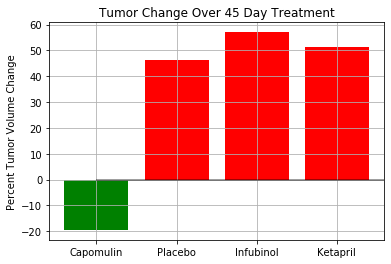

In [24]:
# Saving the drug names we care about to the x_axis variable
x_axis= ("Capomulin","Placebo","Infubinol","Ketapril")

# saving the percent change values to another variable called y_axis
y_axis= tumor_pc

# plotting the grid
plt.grid(True)

# creating an h line so negative values can be placed 
plt.hlines(0, 0, 10, alpha=0.50)

# assigning colors to passing vs failing drugs 
plt.bar(x_axis,y_axis, color=['green', 'red', 'red', 'red'])

# labeling the title of the graph and the yaxis label
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Percent Tumor Volume Change")



In this analysis we compared Capomulin, Infubinol, and Ketapril against Placebo as treatments for squamos cell carcinoma(SCC). The first observation is that Capomulin was the only drug that was more effective than the Placebo treatment in reducing the size of the orginal tumor over the course of 45 days. 
The second observation is that both Capomulin, and Infubinol were more effective than Placebo in treating the amout of metastasis that formed in the mice over the 45 days. While, Ketapril, was not anymore effective than the Placebo treatment at all. 
A final observation is that only Capomulin was more effective than Placebo in keeping the mice alive over the course of treatment. As a staggering 84% of mice survived compared to the 44% of Placebo treated mice who survived. A shocking result was that of the Infubinol treated mice only 36% survived 45 days. This is shocking because Infubinol actually contained the spread of metastasis more effectively than Placebo and Ketapril, and yet performed worse in survival rates. 

Capomulin is far and away the best performing drug of the group. It proved extremely effective in reducing tumor volume, stopping the spread of SCC, and increasing survival rates.